In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
L = 32.0
rho = 3.0
N = int(rho*L**2)
print(" N",N)
 
r0 = 1.0
deltat = 1.0
factor =0.5
v0 = r0/deltat*factor
iterations = 10000
eta = 0.15
 
 
pos = np.random.uniform(0,L,size=(N,2))
orient = np.random.uniform(-np.pi, np.pi,size=N)

 N 3072


1
1


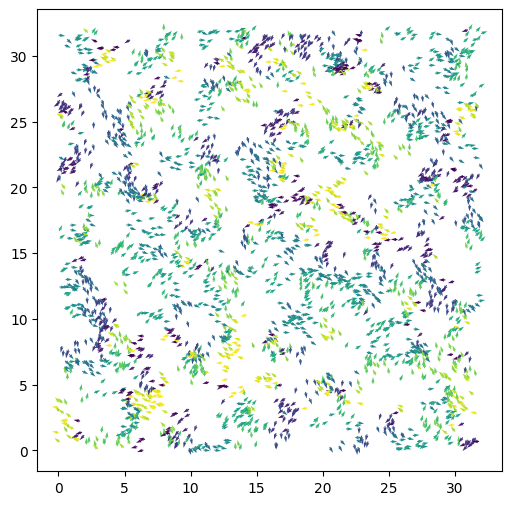

In [4]:
fig, ax= plt.subplots(figsize=(6,6))
 
qv = ax.quiver(pos[:,0], pos[:,1], np.cos(orient[0]), np.sin(orient), orient, clim=[-np.pi, np.pi])
 
def animate(i):
    print(i)
 
    global orient
    tree = cKDTree(pos,boxsize=[L,L])
    dist = tree.sparse_distance_matrix(tree, max_distance=r0,output_type='coo_matrix')
 
    #important 3 lines: we evaluate a quantity for every column j
    data = np.exp(orient[dist.col]*1j)
    # construct  a new sparse marix with entries in the same places ij of the dist matrix
    neigh = sparse.coo_matrix((data,(dist.row,dist.col)), shape=dist.get_shape())
    # and sum along the columns (sum over j)
    S = np.squeeze(np.asarray(neigh.tocsr().sum(axis=1)))
     
     
    orient = np.angle(S)+eta*np.random.uniform(-np.pi, np.pi, size=N)
 
 
    cos, sin= np.cos(orient), np.sin(orient)
    pos[:,0] += cos*v0
    pos[:,1] += sin*v0
 
    pos[pos>L] -= L
    pos[pos<0] += L
 
    qv.set_offsets(pos)
    qv.set_UVC(cos, sin,orient)
    return qv,
 
anim = FuncAnimation(fig,animate,np.arange(1, 200),interval=1, blit=True)
plt.show()

[(<matplotlib.legend.Legend at 0x16733f0be20>, None),
 (<matplotlib.legend.Legend at 0x16733f340a0>, None),
 (<matplotlib.legend.Legend at 0x16733f36110>, None)]

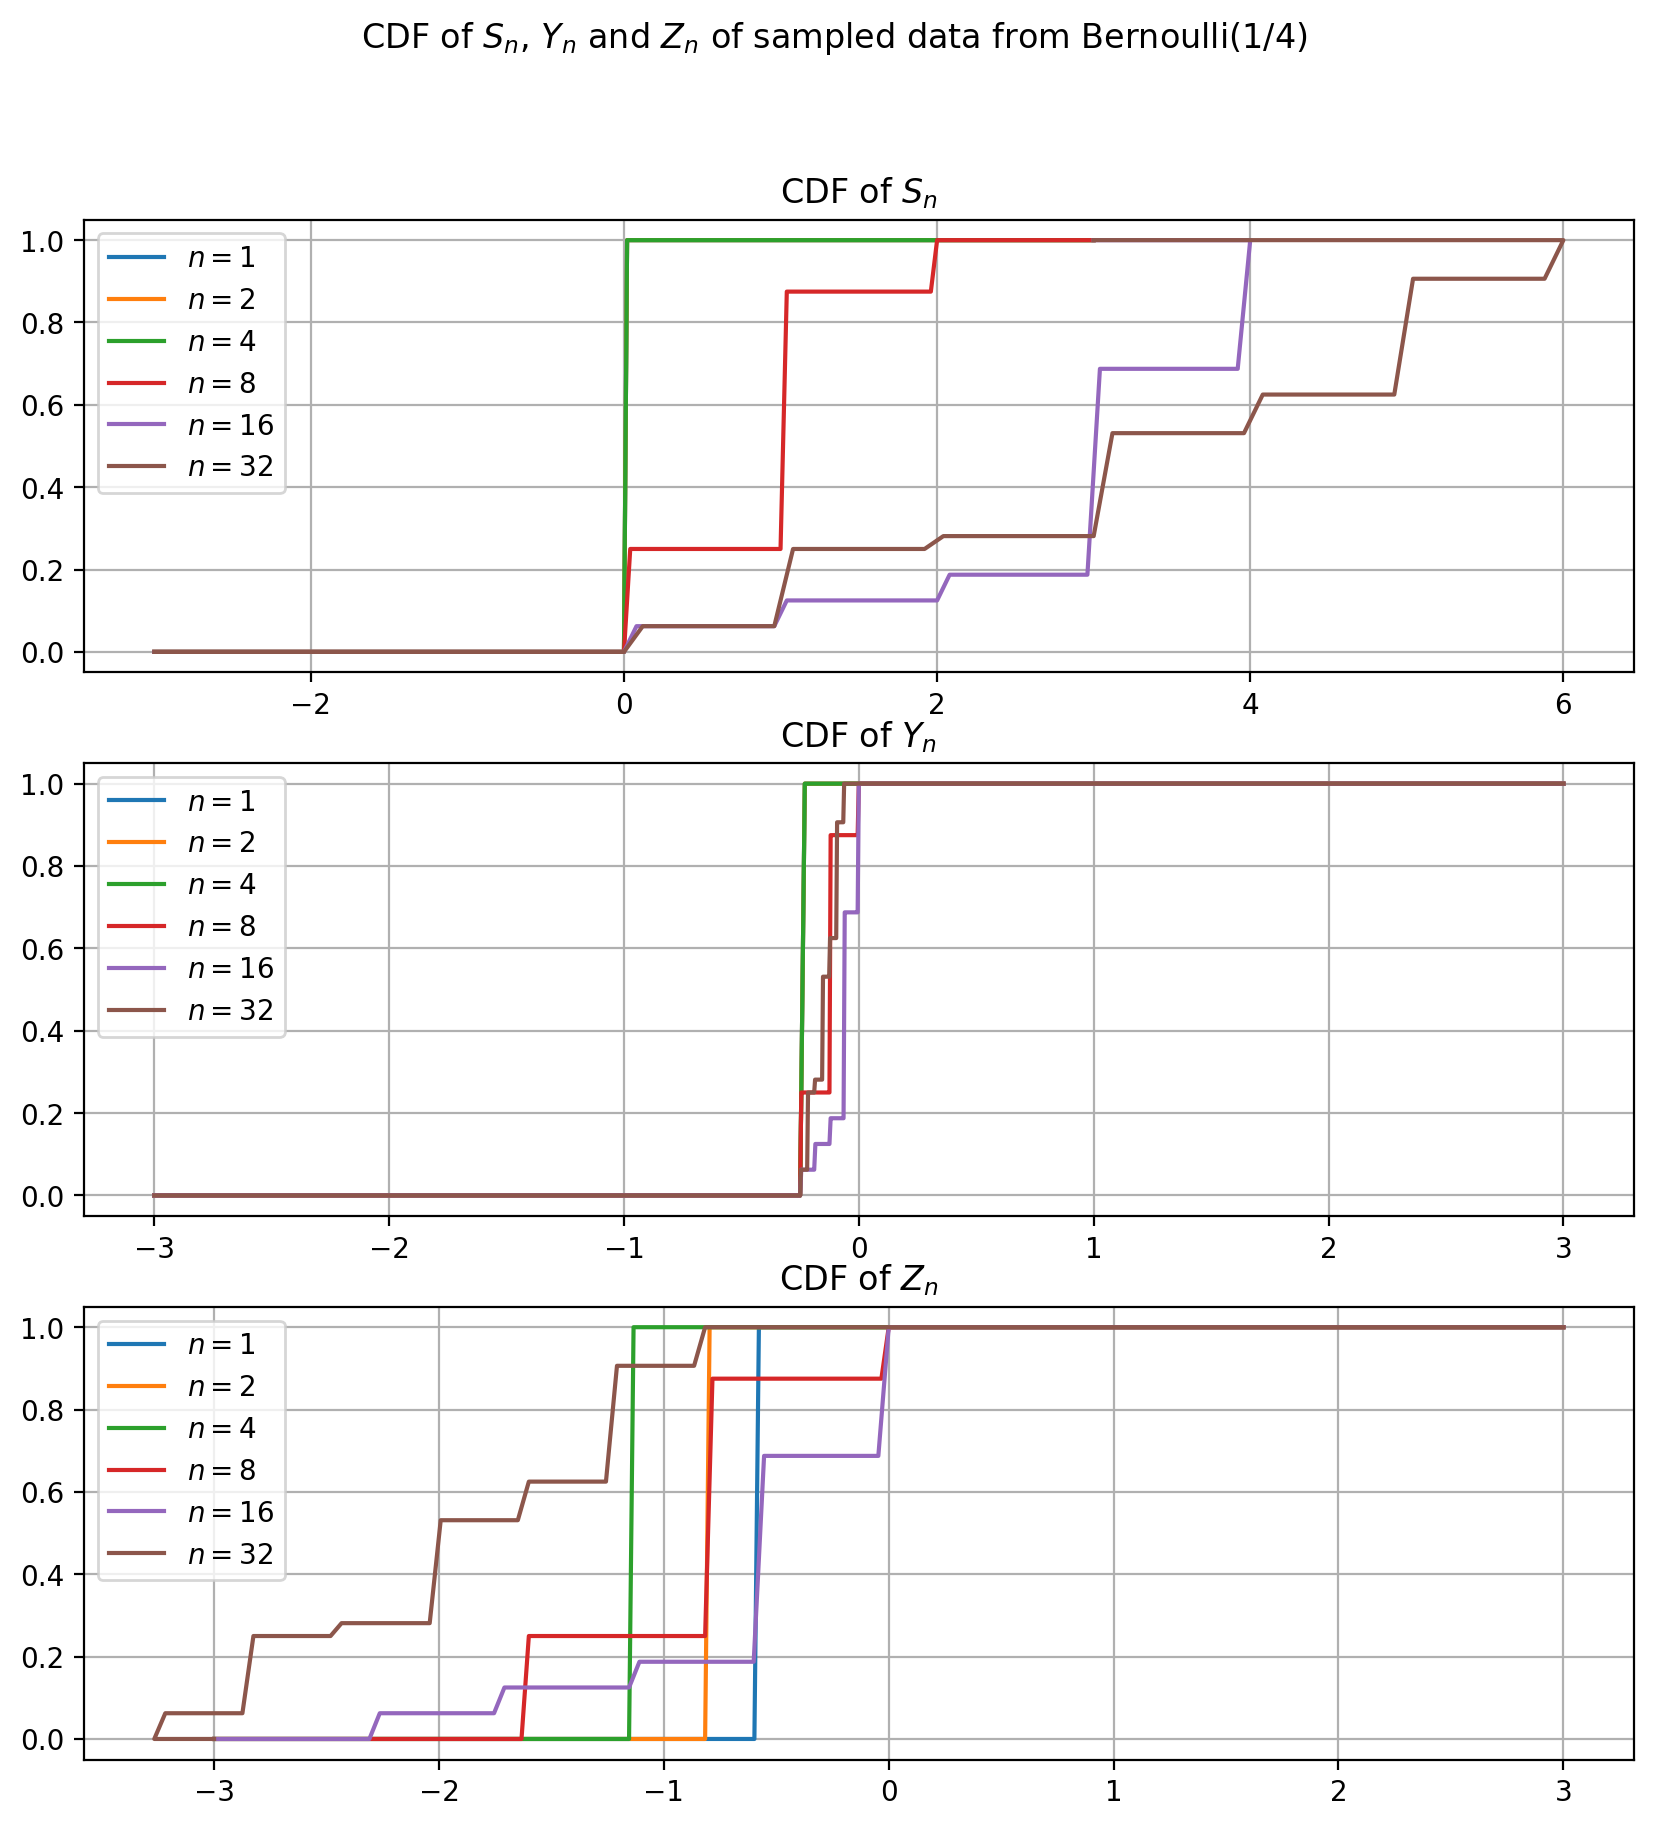

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats 

ns = [1, 2, 4, 8, 16, 32]

EX = 1/4
DX = 3/16

def get_cdf(data):
    counts, bin_edges = np.histogram(data, bins=50, density=True)
    cdf = np.cumsum(counts) * np.diff(bin_edges)
    return [-3] + list(bin_edges) + [3], [0, 0] + list(cdf) + [1]

fig, axs = plt.subplots(3, 1, figsize=(10, 10), dpi=200)

fig.suptitle("CDF of $S_n$, $Y_n$ and $Z_n$ of sampled data from $\mathrm{Bernoulli}(1/4)$")

for n in ns:
    X = np.random.choice(a=[1, 0], p=[0.25, 0.75], size=(n,))
    S_n = X.cumsum()
    Y_n = (S_n - n * EX)/n 
    Z_n = (S_n - n * EX)/(np.sqrt(n * DX))

    for i, (name,t) in enumerate([("S_n", S_n), ("Y_n", Y_n), ("Z_n", Z_n)]):
        if n == 1:
            axs[i].set_title(f"CDF of ${name}$")
        axs[i].plot(*get_cdf(t), label=f"$n={n}$")

[(a.legend(), a.grid()) for a in axs]

In [6]:
X = np.random.choice(a=[1, 0], p=[0.25, 0.75], size=(n,))
X

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0])